## CHAPTER 1
---
# THE REALM OF SUPERVISED LEARNING

---
### Introduction

- **Supervised learning**: building a machine learning model that is based on labeled samples

- **Unsupervised learning**: there is no labeled data available

## 1.1 Buiding a Linear Regressor

- The linear regression method consists of precisely identifying a line that is capable of representing point distribution in a two-dimensional plane
- There is only one mathematical model, out of an infinite number of lines, that optimizes the representation of the given data
- **Ordinary least squares**: the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses

In [1]:
filename = "data/VehiclesItaly.txt"

X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
        
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [6]:
import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

(array([[ 145263.],
        [ 204477.],
        [ 361034.],
        [ 616716.],
        [ 885665.],
        [ 773600.],
        [ 850513.],
        [ 996733.],
        [ 827967.],
        [1011436.],
        [1222738.],
        [2404651.],
        [2259795.],
        [2844588.],
        [2774071.],
        [3011089.]]),
 array([ 127329.,  312027.,  573694.,  891181., 1059114., 1221218.,
        1326513., 1543752., 1571053., 1658138., 1970521., 3744398.,
        4077166., 4404246., 4448146., 4915123.]),
 array([[3169307.],
        [3346791.],
        [3702114.],
        [5923476.]]),
 array([ 5074261.,  5850850.,  5888472., 10008349.]))

In [3]:
# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# Predict the output
y_train_pred = linear_regressor.predict(X_train)

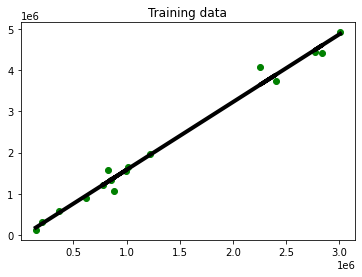

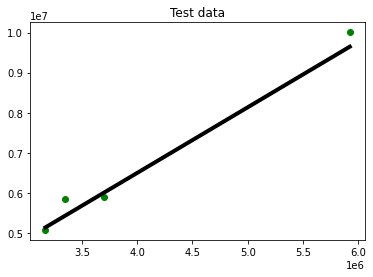

In [4]:
# Plot outputs
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

## 1.2 Computing regression accuracy

In [5]:
# Measure performance
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


A good practice is to make sure that the mean squared error is low and the explained variance score is high

The *sklearn.metrics* module contains a series of simple functions that measure prediction error:
- Functions ending with  _score return a value to maximize; the higher the better
- Functions ending with _error or _loss return a value to minimize; the lower the better